In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [2]:
aapl = pd.read_csv("../data/CompanyValues.csv")
aapl = aapl.loc[aapl["ticker_symbol"].isin(["AAPL"])]\
    [["day_date", "close_value", "volume", "open_value", "high_value", "low_value"]]
aapl["day_date"] = pd.to_datetime(aapl["day_date"], format="%Y-%m-%d")
aapl = aapl.sort_values(by=["day_date"])
aapl = aapl.set_index("day_date")
aapl

,close_value,volume,open_value,high_value,low_value
day_date,,,,,
2010-06-01,37.2614,218455576,37.0986,37.9914,36.9943
2010-06-02,37.7071,171594061,37.7914,37.8286,37.1907
2010-06-03,37.5886,162341809,37.8828,37.9357,37.2014
2010-06-04,36.5664,189045767,36.8871,37.4143,36.3757
2010-06-07,35.8486,221253336,36.8986,37.0214,35.7928
...,...,...,...,...,...
2020-05-22,318.8900,20450750,315.7700,319.2300,315.3500
2020-05-26,316.7300,31380450,323.5000,324.2400,316.5000
2020-05-27,318.1100,28236270,316.1400,318.7100,313.0900


In [3]:
aapl.describe()

,close_value,volume,open_value,high_value,low_value
count,3085.000000,3.085000e+03,3085.000000,3085.000000,3085.000000
mean,127.031672,6.349523e+07,126.996091,128.173068,125.823986
std,62.746604,5.083283e+07,62.601952,63.335413,62.035585
min,34.275700,1.136205e+07,34.005700,34.658600,33.651400
25%,77.998500,2.787622e+07,78.310000,78.867100,77.202800
50%,113.400000,4.455079e+07,113.380000,114.362600,112.270000
75%,170.150000,8.350960e+07,170.490000,171.750000,169.000000
max,327.200000,4.624423e+08,324.740000,327.850000,323.350000


In [14]:
aapl["close_pct"] = aapl.close_value.pct_change().dropna().asfreq("D") * 100

In [15]:
aapl

,close_value,volume,open_value,high_value,low_value,close_pct
day_date,,,,,,
2010-06-01,37.2614,218455576,37.0986,37.9914,36.9943,NaN
2010-06-02,37.7071,171594061,37.7914,37.8286,37.1907,1.196144
2010-06-03,37.5886,162341809,37.8828,37.9357,37.2014,-0.314264
2010-06-04,36.5664,189045767,36.8871,37.4143,36.3757,-2.719442
2010-06-07,35.8486,221253336,36.8986,37.0214,35.7928,-1.963004
...,...,...,...,...,...,...
2020-05-22,318.8900,20450750,315.7700,319.2300,315.3500,0.643838
2020-05-26,316.7300,31380450,323.5000,324.2400,316.5000,-0.677350
2020-05-27,318.1100,28236270,316.1400,318.7100,313.0900,0.435702


In [16]:
aapl.columns

Index(['close_value', 'volume', 'open_value', 'high_value', 'low_value',
       'close_pct'],
      dtype='object')

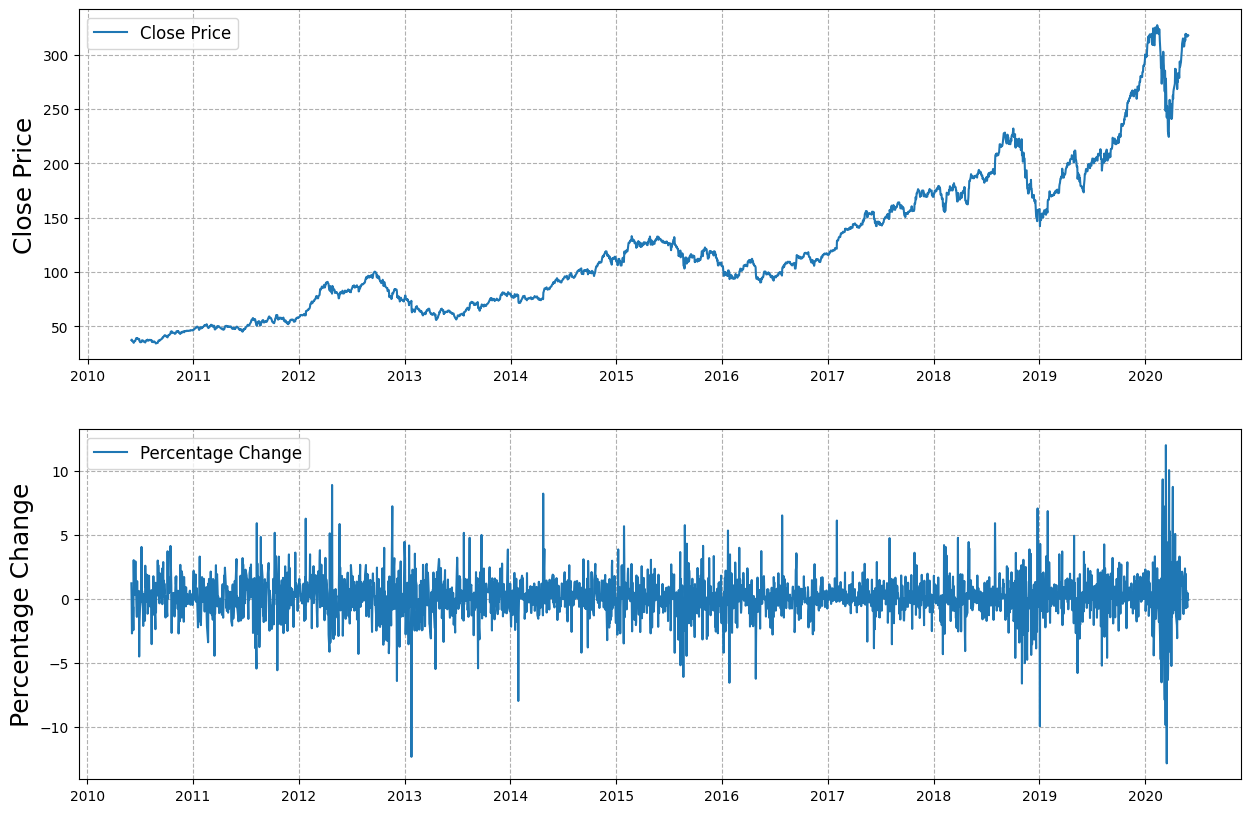

In [17]:
fig = plt.figure(figsize=(15,10))
# st = fig.suptitle(f"{ticker} Close Price")
# st.set_y(0.92)

ax1 = fig.add_subplot(211)
ax1.plot(aapl['close_value'], label=f'Close Price')
ax1.set_ylabel('Close Price', fontsize=18)
ax1.legend(loc="upper left", fontsize=12)
ax1.grid(linestyle="--")

ax2 = fig.add_subplot(212)
ax2.plot(aapl['close_pct'], label=f'Percentage Change')
ax2.set_ylabel('Percentage Change', fontsize=18)
ax2.legend(loc="upper left", fontsize=12)
ax2.grid(linestyle="--")

In [18]:
mod = AutoReg(aapl.close_pct.dropna(), 3, old_names=False)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:              close_pct   No. Observations:                 3084
Model:                     AutoReg(3)   Log Likelihood               -5735.578
Method:               Conditional MLE   S.D. of innovations              1.557
Date:                Sat, 14 Jan 2023   AIC                          11481.156
Time:                        13:53:16   BIC                          11511.321
Sample:                             3   HQIC                         11491.992
                                 3084                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0843      0.028      2.993      0.003       0.029       0.140
close_pct.L1    -0.0587      0.018     -3.262      0.001      -0.094      -0.023
close_pct.L2     0.0241      0.018      1.33

/opt/miniconda3/envs/adc_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [19]:
res = mod.fit("HC0")
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:              close_pct   No. Observations:                 3084
Model:                     AutoReg(3)   Log Likelihood               -5735.578
Method:               Conditional MLE   S.D. of innovations              1.557
Date:                Sat, 14 Jan 2023   AIC                          11481.156
Time:                        13:53:16   BIC                          11511.321
Sample:                             3   HQIC                         11491.992
                                 3084                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0843      0.029      2.878      0.004       0.027       0.142
close_pct.L1    -0.0587      0.034     -1.746      0.081      -0.125       0.007
close_pct.L2     0.0241      0.031      0.78

In [20]:
sel = ar_select_order(aapl.close_pct.dropna(), 13, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:              close_pct   No. Observations:                 3084
Model:                     AutoReg(1)   Log Likelihood               -5741.014
Method:               Conditional MLE   S.D. of innovations              1.558
Date:                Sat, 14 Jan 2023   AIC                          11488.028
Time:                        13:53:18   BIC                          11506.129
Sample:                             1   HQIC                         11494.530
                                 3084                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0863      0.028      3.071      0.002       0.031       0.141
close_pct.L1    -0.0598      0.018     -3.325      0.001      -0.095      -0.025
                                    Roots   

/opt/miniconda3/envs/adc_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/adc_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


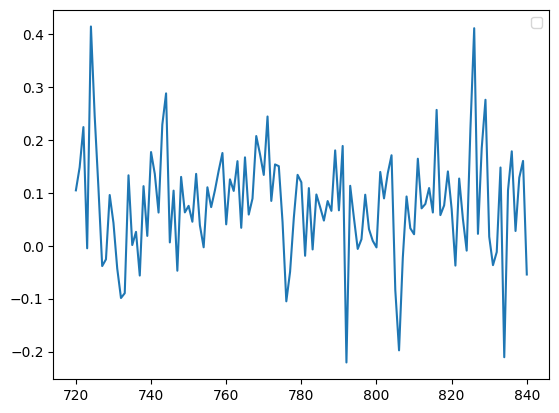

In [21]:
fig = res.plot_predict(720, 840)

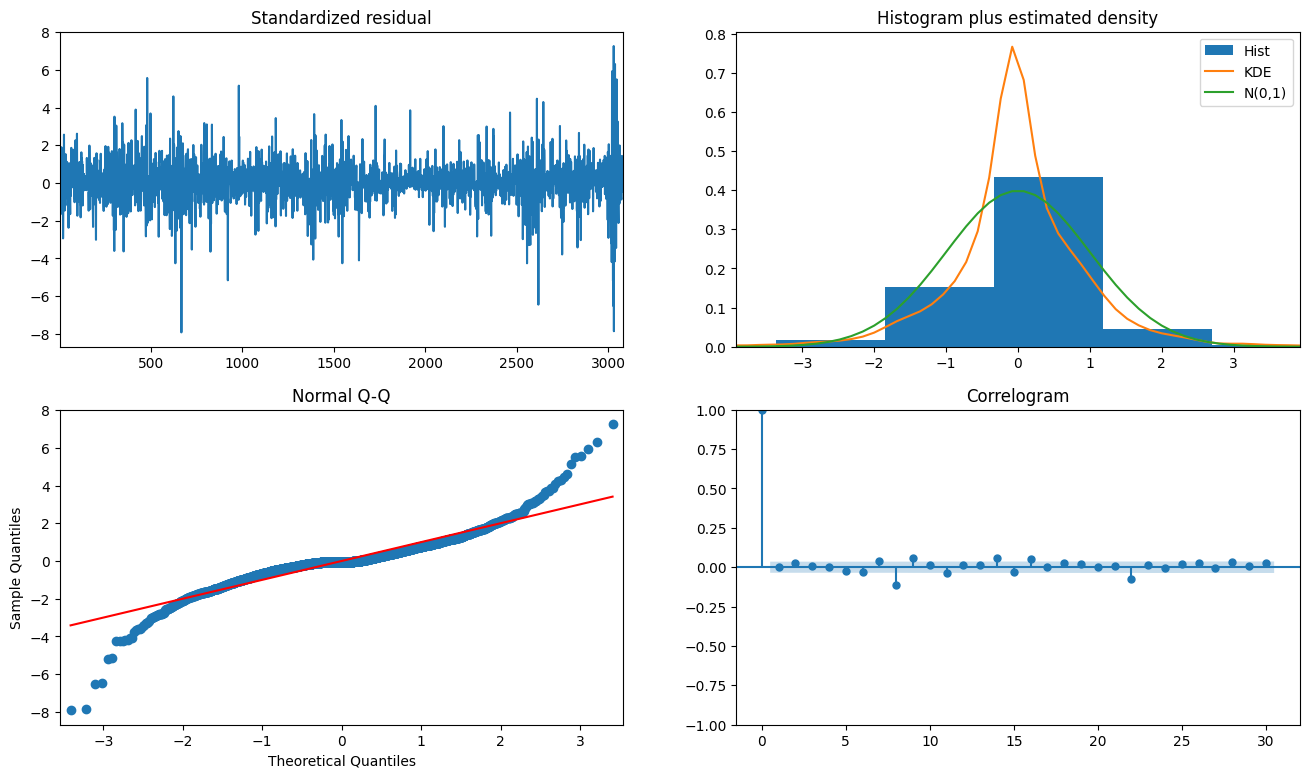

In [22]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=30)


In [23]:
sel = ar_select_order(aapl.close_pct.dropna(), 2, seasonal=True, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

/opt/miniconda3/envs/adc_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ValueError: freq cannot be inferred from endog and model includes seasonal terms.  The number of periods must be explicitly set when the endog's index does not contain a frequency.